In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

df = pd.read_csv(url, sep=",", names=names, index_col=None)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# the class
for i in df["class"].unique():
    print(i)

Iris-setosa
Iris-versicolor
Iris-virginica


We are testing if there is a significant difference in the sepal length between the species iris-setosa and iris-virginica.

In [5]:
# group the data by the class 
df.groupby("class")["sepal_length"].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [6]:
# create two dataframes that are subsets of the original data
setosa = df[(df["class"] == "Iris-setosa")]
virginica = df.loc[df["class"] == "Iris-virginica"]

* Testing for assumptions, ie homogenity of variances - an assumption of the independent samples t-test and ANOVA stating that there is equal variance between independent comparison groups.

### Hypotheses

* $H_O$: The variance are equal across all the samples/independent groups
* $H_A$: The variance are not equal acrosss the sample/independet groups

If we get a p-value larger than 0.05, we can assume that the data is heteroscedastic and can continue carrying out the t-test. 

### 1. Bartlett's Test with Scipy

In [7]:
# import bartletts test 
from scipy.stats import bartlett

# subsetting the data 
set_len = setosa["sepal_length"]
virg_len = virginica["sepal_length"]

# bartlett's test 
stat, p = bartlett(set_len, virg_len)

# display the results 
print(stat, p)

15.986688885110748 6.378941946712554e-05


* If we consider the level of significance $\alpha$ value to be ```0.05```, the $p$-value obtained above is less than 0.05, therefor, we reject the null hypothesis and we accept the alternative hypothesis.
* The groups don't have an equal variance, and they are from different populations.

In [25]:
import pingouin as pg

# bartlett's test with pingouin
pg.homoscedasticity(df, dv="sepal_length",group = "class", method="bartlett")

,T,pval,equal_var
bartlett,16.005702,0.000335,False


In [48]:
# subsetting the data 
set_len = setosa["sepal_width"]
virg_len = virginica["sepal_width"]

# bartlett's test 
stat, p = bartlett(set_len, virg_len)

# display the results 
print(stat, p)

1.3428376635346924 0.24653415985028385


In [49]:
# bartlett's test with pingouin
pg.homoscedasticity(df, dv="sepal_width",group = "class", method="bartlett")

,T,pval,equal_var
bartlett,2.215813,0.33025,True


## 2. Levene's Test with Spicy

In [27]:
# import levene test 
from scipy.stats import levene

# levene's test 
stat, p = levene(setosa["sepal_width"], virginica["sepal_width"])

# display the results 
print(stat, p)

1.0574747096290729 0.30632327568956713


We fail to reject the null hypothesis because the p-value is greater than ```0.05```, meaning there is homogenity of variance and we can proceed.

In [29]:
# levene's test with pingouin
pg.homoscedasticity(df, dv="sepal_width",group = "class", method="levene")

,W,pval,equal_var
levene,0.647522,0.524827,True


* Test the assumption of normality, we can use visuals ie histogram/q-qplot and the Shapiro-Wilk

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

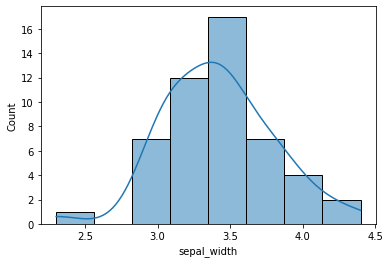

In [31]:
sns.histplot(data=setosa, x="sepal_width", kde=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

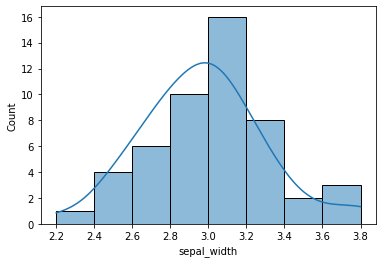

In [32]:
sns.histplot(data=virginica, x="sepal_width", kde=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

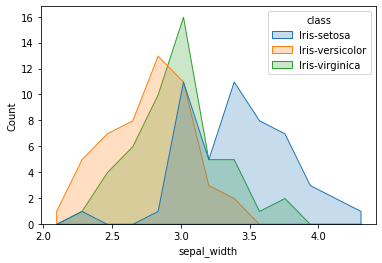

In [8]:
sns.histplot(data=df, x="sepal_width", hue = "class", element="poly")

* From the looks of the histogram, the variables appear to be fairly normally distributed.

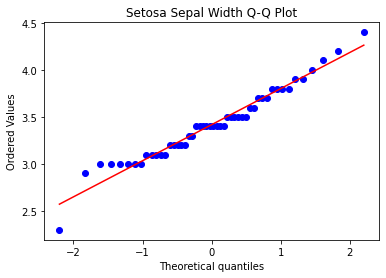

In [39]:
stats.probplot(setosa["sepal_width"], dist="norm", plot=plt)
plt.title("Setosa Sepal Width Q-Q Plot")
plt.show()

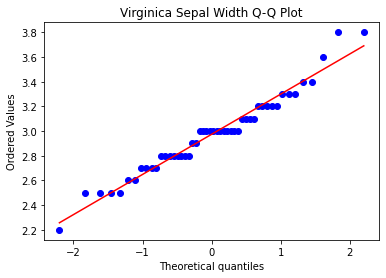

In [40]:
stats.probplot(virginica["sepal_width"], dist="norm", plot=plt)
plt.title("Virginica Sepal Width Q-Q Plot")
plt.show()

* The data should be on the red line, incase there are data points that are far off it, it's an indication that there are some deviations from Normality.
* In both the plots, there is some deviation from normality but it doesn't appear to be a large violation and we can live with that.
* In all the data looks to have normality but we can test it statistically using the Shapiro-Wilk test for normality.

In [41]:
# shapiro test on Virginica

stat, p = stats.shapiro(virginica["sepal_width"])

# display the results 
display(stat, p)

0.9673910140991211

0.1809043288230896

In [46]:
# shapiro test on Setosa 

stat, p = stats.shapiro(setosa["sepal_width"])

# display the results 
display(stat, p)

0.968691885471344

0.20465604960918427

* Neither attribute/variable violates the assumption of normality.

In [47]:
# conduct the t-test
stat, p = stats.ttest_ind(setosa["sepal_width"], virginica["sepal_width"])

# display the results
display(stat, p)

6.289384996672061

8.916634067006443e-09

The independent t-test results are significant and therefor we reject the null hypothesis and accept the alternate hypothesis.